In [202]:
## Erdos Bootcamp
## Josimar A. Silva, May 2021
## This script reads and plot the EEG dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
## reading dataframe
df = pd.read_csv('./data/FullData/dataHeader.csv')
sensorValue = np.loadtxt('./data/FullData/sensorValue.dat')

In [204]:
## Merging the header information and the sensorValue. This helps later on to filter the dataframe.
df['groupUnicode'] = df['group'] == 'a' 
df['groupUnicode'] = df['groupUnicode'].astype(int)

dfAll = pd.DataFrame(sensorValue)
dfAll.head()

dfAll.insert(0,column='groupUnicode',value=df['groupUnicode'])
dfAll.insert(0,column='chanNumber',value=df['chanNumber'])
dfAll.insert(0,column='channel',value=df['channel'])
dfAll.insert(0,column='trial',value=df['trial'])
dfAll.insert(0,column='condition',value=df['condition'])
dfAll.insert(0,column='subject',value=df['subject'])
dfAll.insert(0,column='group',value=df['group'])
idStart=7 ## defines the column number where the sensor data starts
dfAll.head()

,group,subject,condition,trial,channel,chanNumber,groupUnicode,0,1,2,...,246,247,248,249,250,251,252,253,254,255
0,a,co2a0000436,S1 obj,0,FP1,0,1,8.006,8.494,8.494,...,11.912,8.494,6.541,6.053,6.541,7.517,9.471,11.424,14.353,17.771
1,a,co2a0000436,S1 obj,0,FP2,1,1,2.096,3.072,3.072,...,-53.569,-56.986,-59.428,-61.381,-61.381,-60.893,-59.916,-57.963,-55.033,-52.592
2,a,co2a0000436,S1 obj,0,F7,2,1,8.199,7.711,6.734,...,8.687,6.246,4.781,3.316,2.340,3.316,5.758,9.664,14.058,17.965
3,a,co2a0000436,S1 obj,0,F8,3,1,-6.114,-4.649,-1.719,...,-3.672,-6.602,-9.043,-10.508,-10.020,-8.067,-6.602,-5.137,-4.649,-4.161
4,a,co2a0000436,S1 obj,0,AF1,4,1,4.812,4.812,4.323,...,-24.485,-26.438,-27.903,-28.880,-28.392,-27.903,-26.927,-25.462,-23.997,-22.044


In [205]:
## Defining window to compute feature 
dt = 3.9 ## ms
tMin = 250
tMax = 350
tData = np.arange(0,255) * dt
indexTMinSearch = int(tMin / dt) + idStart ## 200 ms
indexTMaxSearch = int(tMax / dt) + idStart ## 600 ms

print("idMin search = ", indexTMinSearch)
print("idMax search = ", indexTMaxSearch)


idMin search =  71
idMax search =  96


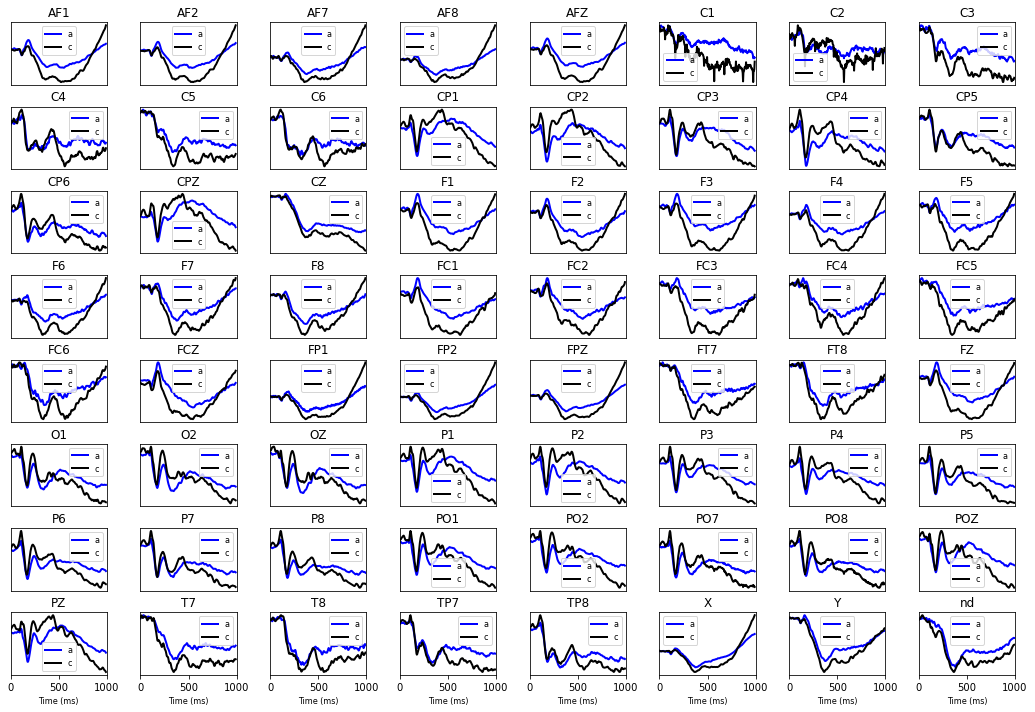

In [206]:
## Plot the average sample value for all sensor for diffent conditions

## Select the condition below
#conditionSelected='S1 obj'
#conditionSelected='S2 nomatch'
conditionSelected='S2 match'

##Get all selected channels
cNameAll = (dfAll['channel'].unique())
cNameAll = sorted(cNameAll)

fontSize=8
plt.figure(figsize=(18,12))
plt.subplots_adjust(wspace=0.35,hspace=0.35)
count=1
for cName in cNameAll:
    tmpA = dfAll[ (dfAll['channel'] == cName) & (dfAll['condition'] == conditionSelected) & (dfAll['group'] == 'a') ].iloc[:,7:-1].to_numpy().mean(axis=0)
    tmpC = dfAll[ (dfAll['channel'] == cName) & (dfAll['condition'] == conditionSelected) & (dfAll['group'] == 'c') ].iloc[:,7:-1].to_numpy().mean(axis=0)

    plt.subplot(8,8,count)
    plt.plot(tData,tmpA, color="blue", label='a', linewidth=2)
    plt.plot(tData,tmpC, color="black", label='c', linewidth=2)
    plt.title(cName)
    plt.legend(loc="best", fontsize=fontSize)
    if count <= 8*7:
        plt.xticks([])
    elif count > 8*7:
        plt.xlabel('Time (ms)', fontsize=fontSize)
    plt.yticks([])
    #plt.ylim(-4,4)
    plt.xlim(0,1000)
    
    count = count + 1
plt.savefig('./Figures/Condition_'+conditionSelected+'_AllSensors.png', format='png', bbox_inches='tight')

In [ ]:
## Plot the average sensor voltage for all participats for each channel, for each condition

## Select the condition below
conditionSelected='S1 obj'
#conditionSelected='S2 nomatch'
#conditionSelected='S2 match'

##Get all selected channels
subjectAll = df['subject'].unique()
subjectAll = sorted(subjectAll)
cNameAll = sorted(df['channel'].unique())
#cNameAll='CZ'

fontSize=8
plt.figure(figsize=(18,12))
plt.subplots_adjust(wspace=0.35,hspace=0.35)
count=1
for cName in cNameAll:
    plt.subplot(8,8,count)
    print('Working on channel # '+str(count))
    for subject in subjectAll:
        tmpA = dfAll[ (dfAll['channel'] == cName) & (dfAll['subject'] == subject) & (dfAll['group'] == 'a') & (dfAll['condition'] == conditionSelected) ].iloc[:,7:-1].to_numpy()
        tmpC = dfAll[ (dfAll['channel'] == cName) & (dfAll['subject'] == subject) & (dfAll['group'] == 'c') & (dfAll['condition'] == conditionSelected) ].iloc[:,7:-1].to_numpy()
        
        if len(tmpA) > 0:
            tmpA = tmpA.mean(axis=0)
            plt.plot(tData,tmpA, color="blue", label='a', linewidth=1)
        if len(tmpC) > 0:
            tmpC = tmpC.mean(axis=0)
            plt.plot(tData,tmpC, color="black", label='c', linewidth=1)
        plt.title(cName)
        #plt.legend(loc="best", fontsize=fontSize)
        if count <= 8*7:
            plt.xticks([])
        elif count > 8*7:
            plt.xlabel('Time (ms)', fontsize=fontSize)
        plt.yticks([])
        #plt.ylim(-4,4)
        plt.xlim(0,1000)

    count = count + 1
plt.savefig('./Figures/Condition_'+conditionSelected+'_MeanAllTrials_AllSubjects_AllSensors.png', format='png', bbox_inches='tight')
#plt.show()

Working on channel # 1
Working on channel # 2
Working on channel # 3
Working on channel # 4
Working on channel # 5
Working on channel # 6
Working on channel # 7
Working on channel # 8
Working on channel # 9
Working on channel # 10
Working on channel # 11
Working on channel # 12
Working on channel # 13
Working on channel # 14
Working on channel # 15
Working on channel # 16
Working on channel # 17
Working on channel # 18


In [219]:
subjectAll = df['subject'].unique()
subjectAll = sorted(subjectAll)[0:25:2]
print(subjectAll)

['co2a0000364', 'co2a0000368', 'co2a0000370', 'co2a0000372', 'co2a0000377', 'co2a0000379', 'co2a0000381', 'co2a0000384', 'co2a0000386', 'co2a0000388', 'co2a0000392', 'co2a0000395', 'co2a0000398']


In [201]:
## Compute the mean sensor value for each subject for each channel

## Initializing the dataframe to hold results
dfSubject = pd.DataFrame(np.zeros([122, 67])) ## 122 subjects, 64 channels + 3 other columns (subject, group and condition)
dfSubject.rename(columns={0 : 'subject' , 1 : 'group' , 2 : 'condition' } , inplace=True)
dfSubject.head()

conditionAll = sorted(dfAll['condition'].unique())
conditionAll.remove('S2 match err')
conditionAll.remove('S2 nomatch err')

for condition in conditionAll:
    print('\n Working on condition '+condition)
    
    ##Get all channels and create list of subjects
    subjectAll = sorted(dfAll['subject'].unique())[0:3]
    cNameAll = sorted(df['channel'].unique())[0:2]

    countRow=0
    for subject in subjectAll:
        print('Subject number = '+str(countRow)+'\t'+subject)
        group = dfAll[ (dfAll['subject'] == subject) & (dfAll['condition'] == condition) ].iloc[:,0]    
        dfSubject.iloc[countRow,0] = subject
        dfSubject.iloc[countRow,1] = np.unique(group)
        dfSubject.iloc[countRow,2] = condition
        countCol=3
        for cName in cNameAll:
            tmpA = dfAll[ (dfAll['channel'] == cName) & (dfAll['subject'] == subject) & (dfAll['condition'] == condition) ].iloc[:,indexTMinSearch:indexTMaxSearch].to_numpy().mean()
            dfSubject.iloc[countRow,countCol] = tmpA
            countCol=countCol+1

        countRow = countRow + 1

    ## Saving dataframe to file
    fileNameToSave='./data/output/SubjectFeatureMeanAcrossIndividualChannels_'+condition.replace(" ","")+'.csv'
    print('Saving file = ', fileNameToSave)
    dfSubject.to_csv(fileNameToSave, index=False)



 Working on condition S1 obj
Subject number = 0	co2a0000364
Subject number = 1	co2a0000365
Subject number = 2	co2a0000368
Saving file =  ./data/output/SubjectFeatureMeanAcrossIndividualChannels_S1obj.csv

 Working on condition S2 match
Subject number = 0	co2a0000364
Subject number = 1	co2a0000365
Subject number = 2	co2a0000368
Saving file =  ./data/output/SubjectFeatureMeanAcrossIndividualChannels_S2match.csv

 Working on condition S2 nomatch
Subject number = 0	co2a0000364
Subject number = 1	co2a0000365
Subject number = 2	co2a0000368
Saving file =  ./data/output/SubjectFeatureMeanAcrossIndividualChannels_S2nomatch.csv


In [ ]:
idStart=7
dfFiltered = dfAll.copy()
dfFiltered = dfFiltered[ dfFiltered['condition'] == 'S1 obj' ]
## Extraccting some features
meanValue = np.mean(dfFiltered.iloc[:,idStart+tMinSearch:tMaxSearch], axis=1)
maxValue = np.max(dfFiltered.iloc[:,idStart+tMinSearch:tMaxSearch], axis=1)
minValue = np.min(dfFiltered.iloc[:,idStart+tMinSearch:tMaxSearch], axis=1)
stdValue = np.min(dfFiltered.iloc[:,idStart+tMinSearch:tMaxSearch], axis=1)


In [ ]:
## Adding new attributes to the dataframe
dfFiltered['stdValue'] = stdValue
dfFiltered['meanValue'] = meanValue
dfFiltered['maxValue'] = maxValue
dfFiltered['minValue'] = minValue
dfFiltered.head()

In [ ]:
## Extraccting some features
'''
meanValue = np.mean(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
maxValue = np.max(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
minValue = np.min(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
maxAbsValue = np.max(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
minAbsValue = np.min(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
meanAbsValue = np.mean(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
stdAbsValue = np.std(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
tMax = dt * np.argmax(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1).reshape(sensorValue.shape[0],1)
tMin = dt * np.argmin(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1).reshape(sensorValue.shape[0],1)
tMaxMinDiff = np.abs(tMax - tMin)
sumAbsValue = np.sum(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
sumValue = np.sum(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
percentile95th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 95, axis=1, keepdims=True)
percentile75th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 75, axis=1, keepdims=True)
percentile25th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 25, axis=1, keepdims=True)
percentile5th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 5, axis=1, keepdims=True)
'''


In [ ]:
## Adding new attributes to the dataframe
df['stdValue'] = stdAbsValue
df['meanValue'] = meanValue
df['maxValue'] = maxValue
df['minValue'] = minValue
df['maxAbsValue'] = maxAbsValue
df['minAbsValue'] = minAbsValue
df['meanAbsValue'] = meanAbsValue
df['tMax'] = tMax
df['tMin'] = tMin
df['tMaxMinDiff'] = tMaxMinDiff
df['sumAbsValue'] = sumAbsValue
df['sumValue'] = sumValue
df['percentile95th'] = percentile95th
df['percentile75th'] = percentile75th
df['percentile25th'] = percentile25th
df['percentile5th'] = percentile5th
df.head()

In [ ]:
#sns.pairplot(dfSel,hue="group", diag_kind="hist", vars=["stdValue","tMax","tMin", "tMaxMinDiff","meanValue", "maxValue", "minValue","maxAbsValue","minAbsValue"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
'''
## Adding new attributes to the dataframe
df['stdValue'] = stdAbsValue
df['meanValue'] = meanValue
df['maxValue'] = maxValue
df['minValue'] = minValue
df['maxAbsValue'] = maxAbsValue
df['minAbsValue'] = minAbsValue
df['meanAbsValue'] = meanAbsValue
df['tMax'] = tMax
df['tMin'] = tMin
df['tMaxMinDiff'] = tMaxMinDiff
df['sumAbsValue'] = sumAbsValue
df['sumValue'] = sumValue
df['percentile95th'] = percentile95th
df['percentile75th'] = percentile75th
df['percentile25th'] = percentile25th
df['percentile5th'] = percentile5th
'''

X = dfSel[ ['meanValue','maxValue', 'minValue','sumAbsValue', 'stdValue','maxAbsValue','minAbsValue','meanAbsValue'] ].to_numpy()
y = dfSel[['groupUnicode']].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200, shuffle=True, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train.ravel())

In [ ]:
y_predict = knn.predict(X_train)

## We calculate the accuracy here
## sum a list of booleans and True gets cast as 1
## False gets cast as 0
print("Our model has a ",
      np.round(sum(y_predict == y_train.ravel())/len(y_train.ravel())*100,2),
      "% accuracy on the training set")

In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
nSplits=5
kfold = StratifiedKFold(nSplits,shuffle=True,random_state=440)

In [ ]:
def get_acc(model, X,y):
    pred = model.predict(X)
    return np.sum(pred == y) / len(y)

In [ ]:
max_neighbors = 20

accs = np.zeros((nSplits,max_neighbors))

## Keep track of the train test spli
j = 0

for train_index, test_index in kfold.split(X_train, y_train):
    #print("Train =",train_index)
    #print("Test = ",test_index)
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1, max_neighbors+1):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train_train, y_train_train.ravel())
        accs[j,i-1] = get_acc(knn, X_train_test, y_train_test.ravel())
    j = j + 1

In [ ]:
## Plotting 
sns.set_style("whitegrid")

plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0))

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Accuracy (%)", fontsize=16)

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
get_acc(knn, X_test, y_test.ravel())